In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Preliminary Data Exploration
df = pd.read_csv('QueryResults.csv', names=['Date', 'Tag', 'Posts'], header=0)
df.head()
df.tail()

,Date,Tag,Posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [6]:
df.shape

(1991, 3)

In [7]:
df.count()

Date     1991
Tag      1991
Posts    1991
dtype: int64

In [9]:
# Analysis by programming languagee
df.groupby('Tag').sum()
df.groupby('Tag').count()

,Date,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [16]:
# working with timestamps
# Converting the entire Date column to datetime obj
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [17]:
# Pivoting Dataframes
reshape_df = df.pivot(index='Date', columns='Tag', values='Posts')

In [18]:
reshape_df.shape

(145, 14)

In [19]:
reshape_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [20]:
reshape_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [21]:
reshape_df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [22]:
# Dealing with NaN values
reshape_df.fillna(0, inplace=True)

In [23]:
reshape_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [24]:
reshape_df.isna().values.any()

np.False_

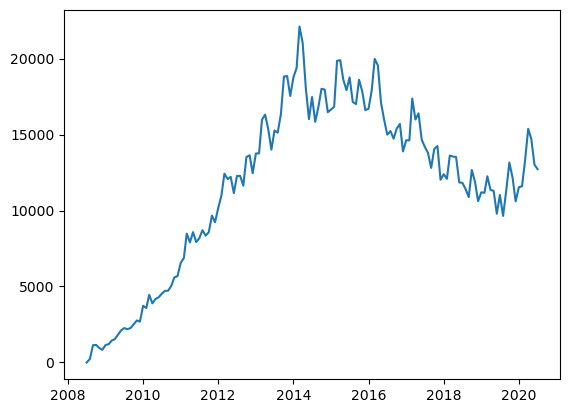

In [28]:
# Data visualization with Matplotlib
plt.plot(reshape_df.index, reshape_df['java'])

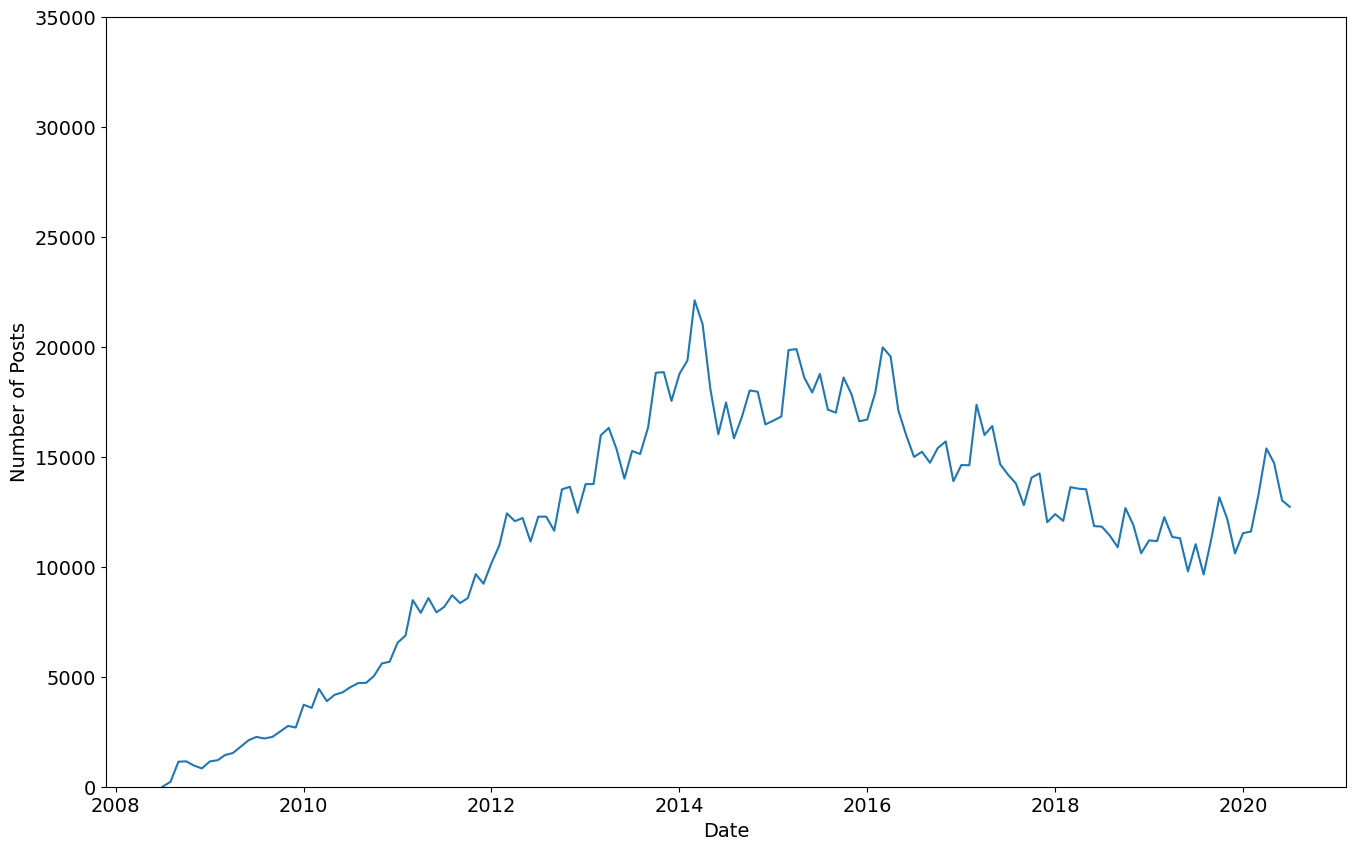

In [32]:
# Styling
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape_df.index, reshape_df.java)

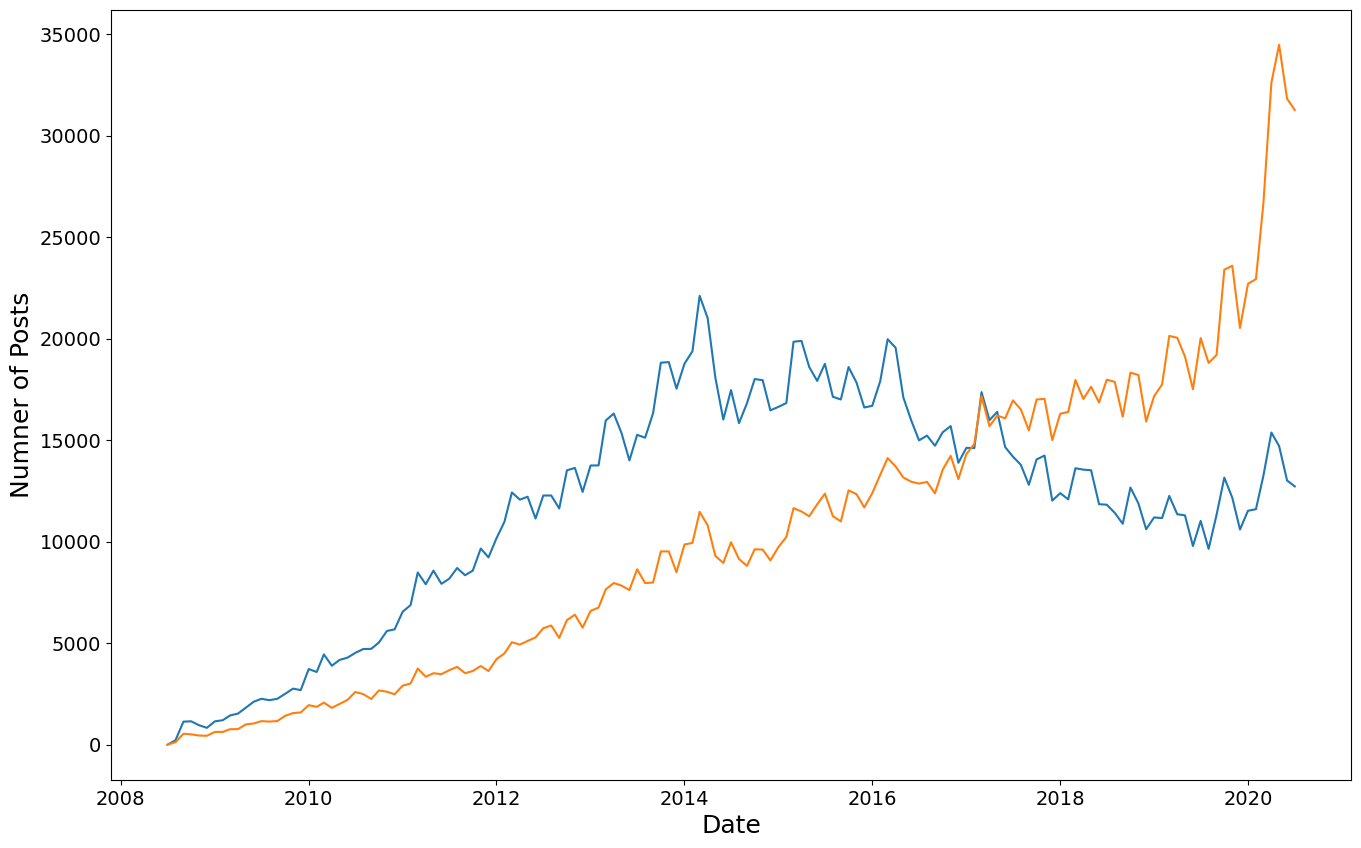

In [33]:
# Multi-line chart 
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Numner of Posts', fontsize=18)
plt.plot(reshape_df.index, reshape_df['java'])
plt.plot(reshape_df.index, reshape_df['python'])


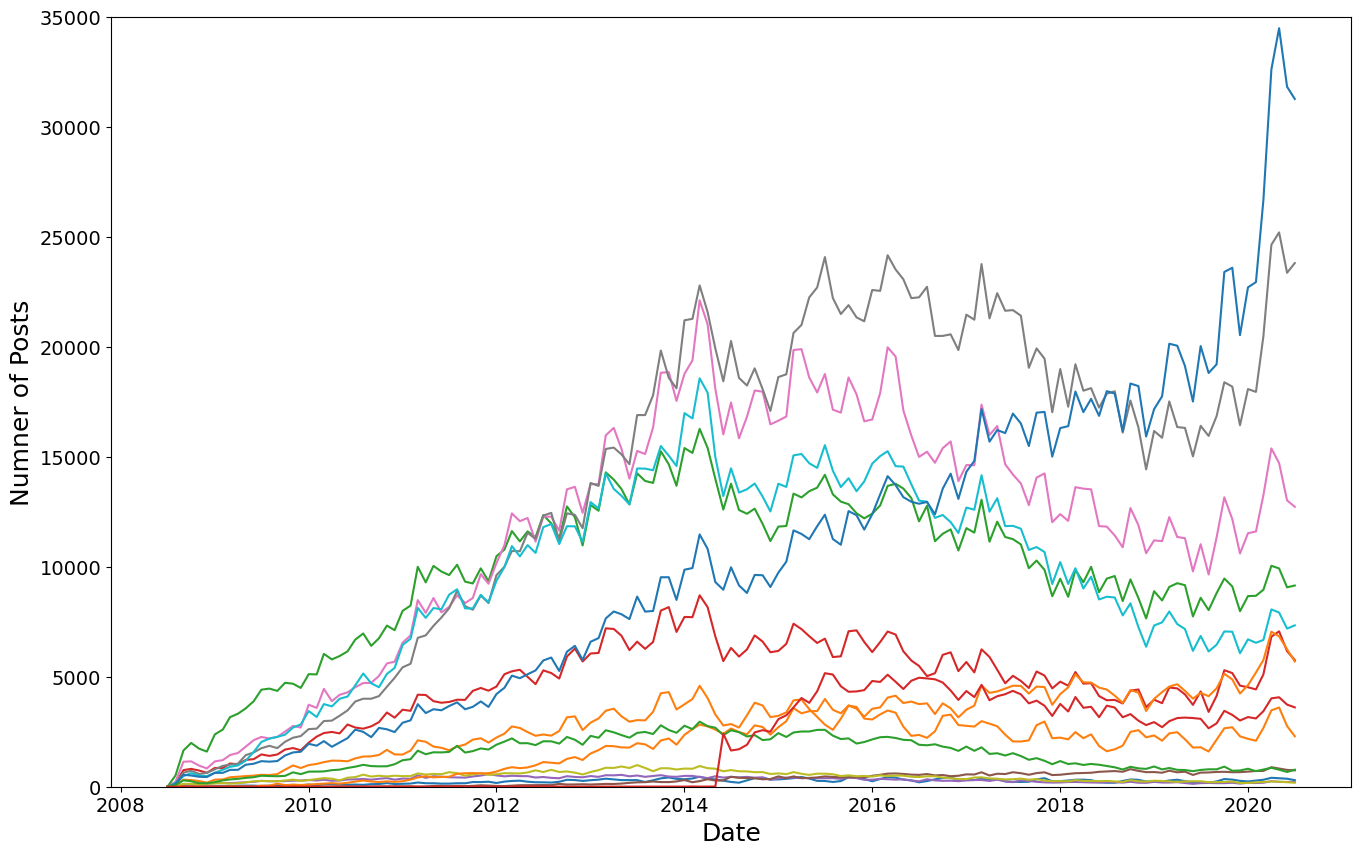

In [34]:
# PLotting All columns
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Numner of Posts', fontsize=18)
plt.ylim(0, 35000)
for column in reshape_df.columns:
    plt.plot(reshape_df.index, reshape_df[column])

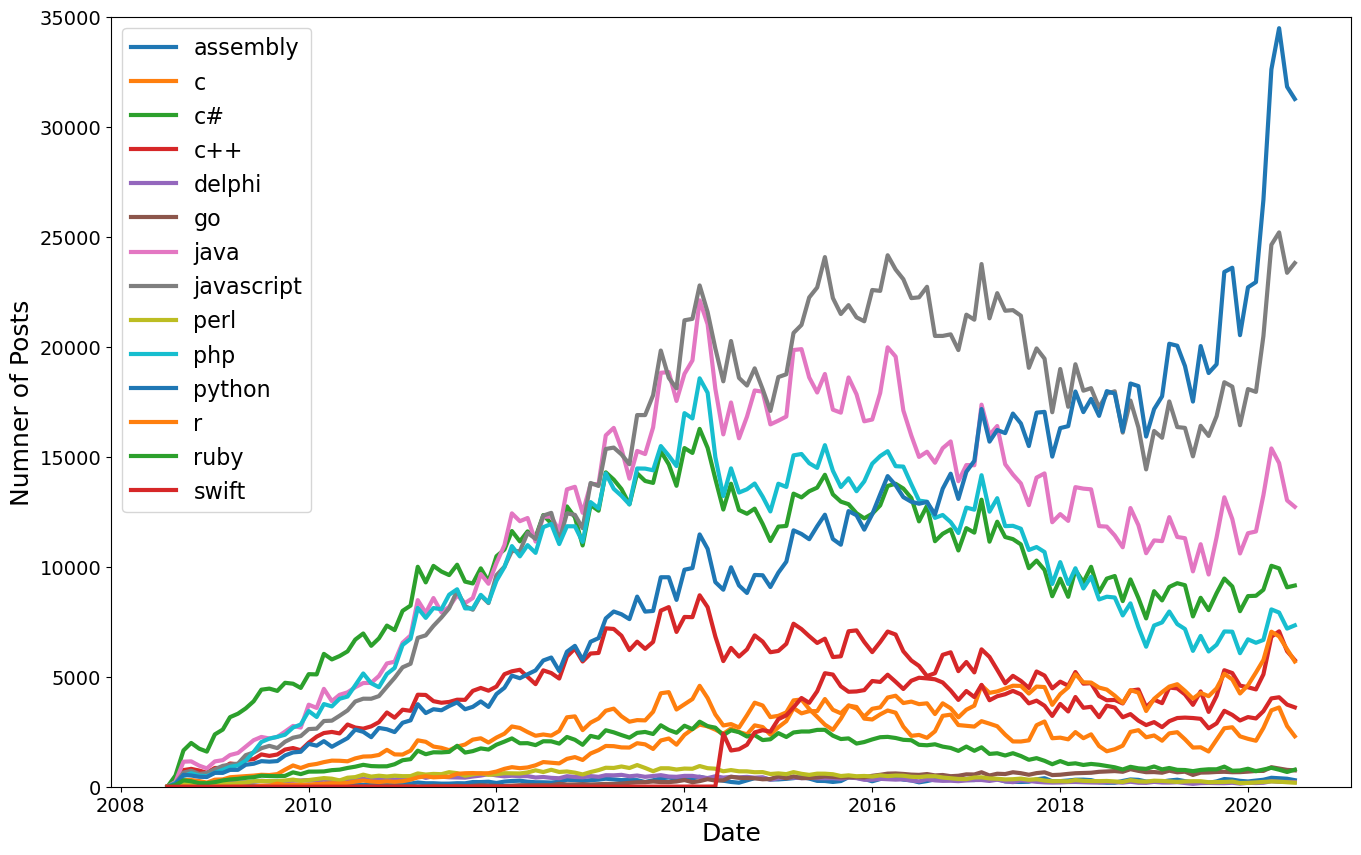

In [35]:
# adding a legend
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Numner of Posts', fontsize=18)
plt.ylim(0, 35000)
for column in reshape_df.columns:
    plt.plot(reshape_df.index, reshape_df[column],
                    linewidth=3, label=reshape_df[column].name)
plt.legend(fontsize=16)

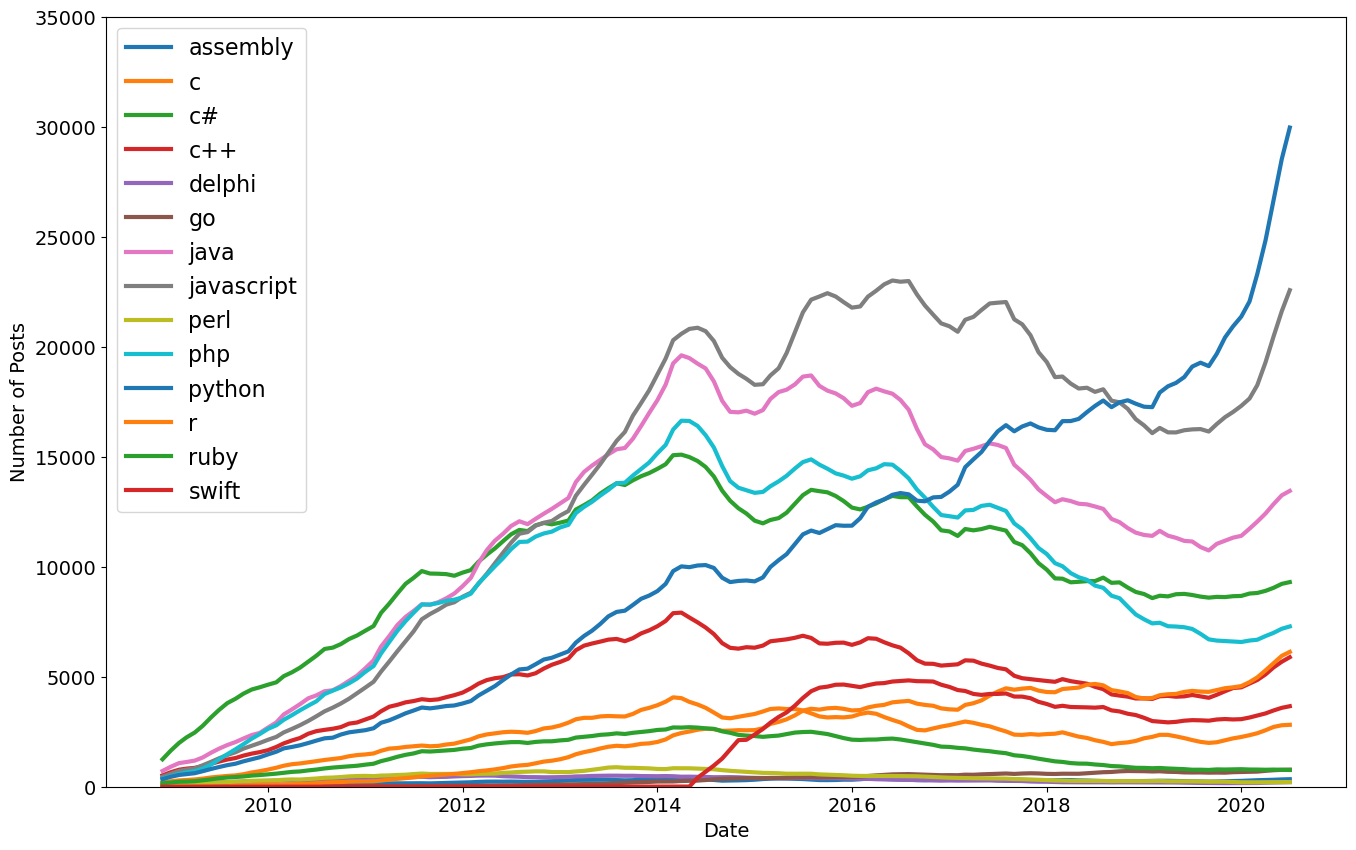

In [36]:
#Soothing out Time-series Data
roll_df = reshape_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# ploting the roll_df instead of reshape_df
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)